In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange


In [2]:
pts = gpd.read_file('../../CIAT/data/BEM_2019_Chiapas_Final_Clean.gpkg')


(array([  73.,  109.,  419.,  470., 1101., 1365.,  800.,  205.,   36.,
          16.]),
 array([ 91. , 106.1, 121.2, 136.3, 151.4, 166.5, 181.6, 196.7, 211.8,
        226.9, 242. ]),
 <a list of 10 Patch objects>)

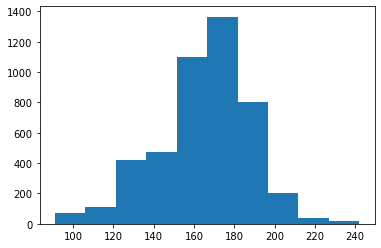

In [134]:
doy = pd.to_datetime(pts.fecha_de_siembra, format= '%Y-%m-%d').dt.dayofyear
plt.hist(doy)

In [3]:
i = 1
for i in trange(len(pts)):
    daymet_file = '/home/rodrigo7/Apsim_test/MASAGRO/PCSE/CH{0:05d}_dm.csv'.format(i + 1)
    daymet_df = pd.read_csv(daymet_file, skiprows=13)
    daymet_df.DAY = pd.to_datetime(daymet_df.DAY, format= '%Y%m%d').dt.date

    nasa_power_file = '/home/rodrigo7/Apsim_test/MASAGRO/PCSE/CH{0:05d}_npf.csv'.format(i + 1)
    nasa_power_df = pd.read_csv(nasa_power_file, skiprows=13)
    nasa_power_df.DAY = pd.to_datetime(nasa_power_df.DAY, format= '%Y%m%d').dt.date

    pvars = ['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN', 'SNOWDEPTH']
    dff = pd.merge(daymet_df, nasa_power_df, on='DAY', suffixes=('', '_np'))
    dff.WIND = dff.WIND_np
    dff = dff.loc[:,pvars]
    dff.DAY = pd.to_datetime(dff.DAY).dt.strftime('%Y%m%d')
    dff.IRRAD = dff.IRRAD.astype('float')
    dff.RAIN = dff.RAIN.astype('float')

    save_file = '/home/rodrigo7/Apsim_test/MASAGRO/PCSE/CH{0:05d}_dmf.csv'.format(i + 1)
    with open(save_file, 'w') as sf:
        with open(nasa_power_file) as f:
            for r in range(14):
                sf.writelines(f.readline())
    dff.to_csv(save_file, na_rep = 'NaN', mode = 'a', float_format = '%.3f', header = False, index = False)
    break

